# Assignment 1


Assignment 1 includes 4 parts. For each part you need to modify the notebook by adding your own programming solutions or written text. 

Remember to save and commit your changes locally, and push your changes to GitHub after each major change! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case your computer crashes (can happen!).

## Notes about the exercise notebook

1. The Python code cells where you should make changes contain text that reads:

    ```Python

    # YOUR CODE HERE
    raise NotImplementedError()
    
    ```
    <br/>**You should delete that text and replace it with your solution (code)**.

   
   <br><br/>
2. The Markdown cells where you should make changes contain text that reads:

    ```text
    
    YOUR ANSWER HERE
    ```
    <br/>**You should delete that text and replace it with your answer**.
<br><br/>

3. Some of the cells in this Jupyter Notebook are `# test-cell`, which means that you must not edit them.
4. **Do not make any changes to the .csv file provided in the data folder.**



# Problem Definition




In this assignment, we'll dive into a dataset containing 100,000 orders made in Brazil from 2016 to 2018. Our goal is to use the features of python `pandas` and `matplotlib`, to explore, calculate, and visualize interesting things about this e-commerce data.


### Description of columns

| Column  | Description  |
| --- | --- |
| order_id | unique identifier of the order. |
| order_status | Reference to the order status (delivered, shipped, etc). |
| order_purchase_timestamp | Shows the purchase timestamp. |
| order_delivered_carrier_date | Shows the order posting timestamp. When it was handled to the logistic partner. |
| order_delivered_customer_date | Shows the actual order delivery date to the customer. |
| order_estimated_delivery_date | Shows the estimated delivery date that was informed to customer at the purchase moment. |
|order_item_id | sequential number identifying number of items included in the same order. |
| --- | --- |
| customer_unique_id | unique identifier of a customer. |
| customer_zip_code_prefix | first five digits of customer zip code |
| customer_city | customer city name |
| customer_state | customer state |
| customer_latitude | customer location information|
| customer_longitude | customer location information|
| --- | --- |
| review_score | Note ranging from 1 to 5 given by the customer on a satisfaction survey. |
| review_comment_message | Comment message from the review left by the customer, in Portuguese. |
| --- | --- |
| price | item price |
| freight_value | item freight value item (if an order has more than one item the freight value is splitted between items) |
| --- | --- |
| product_category_name | root category type of product, in English. |
| --- | --- |
| seller_zip_code_prefix | first 5 digits of seller zip code |
| seller_city | seller city name |


## Part 1 (Loading data)

The first step for this problem is to read the data file `e-commerce_data.csv` into a variable `data` using pandas.

Remember you can use .info() to see more information about your dataframe columns and datatypes.

In [2]:
# import the necessary packages
import pandas as pd

# load the data
data = None




# YOUR CODE HERE
data = pd.read_csv('C:/ENGO645/e-commerce_data.csv')

Check that the first 5 rows of the DataFrame look ok: (show the first 5 rows)

In [3]:




# YOUR CODE HERE
data.head(5)

,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,order_item_id,product_id,price,freight_value,seller_zip_code_prefix,seller_city,product_category_name_english,review_score,customer_latitude,customer_longitude,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,9350.0,maua,housewares,4.0,-23.574809,-46.587471,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,31570.0,belo horizonte,perfumery,4.0,-12.169860,-44.988369,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,14840.0,guariba,auto,5.0,-16.746337,-48.514624,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,31842.0,belo horizonte,pet_shop,5.0,-5.767733,-35.275467,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,8752.0,mogi das cruzes,stationery,5.0,-23.675037,-46.524784,santo andre,SP


## Part 2 (Cleaning data)



### Step 1:
First step in cleaning is to check how many no-data (missing values) and duplicate values we have:

- Check how many no-data (null) values exist for each column
- Check how many duplicate rows exist (How many rows have identical values for all columns)

In [4]:
nodata_count = None # count the number of nodata values
duplicate_count = None # count the number of duplicate values


# YOUR CODE HERE
nodata_count = data.isnull().sum().sum()
duplicate_count = data.duplicated().sum()

In [5]:
######### This is a test-cell that print the number of null and duplicate rows #########

print(f'Number of no-data values in each column:\n {nodata_count} \n')
print(f'Number of duplicate values in each column: {duplicate_count}')

Number of no-data values in each column:
 14520 

Number of duplicate values in each column: 401


### Step 2: 
To clean the data, we need to eliminate any rows containing null values and also remove any duplicate rows.

- Write code to remove all null values
- Write code to remove all duplicate rows in the dataframe.

In [6]:




# YOUR CODE HERE
data = data.dropna().drop_duplicates()


'''
test data.isnull().sum()
test = data.duplicated().sum()
print(test)
'''

'\ntest data.isnull().sum()\ntest = data.duplicated().sum()\nprint(test)\n'

### Step 3:

Next step is to remove unnecessary information.

Some information in the data might be extra for our current analysis including  `seller_zip_code_prefix` and  `seller_city`.

- Identify and remove mentioned columns from the dataframe


In [7]:



# YOUR CODE HERE
data = data.drop(columns=['seller_zip_code_prefix','seller_city'])




For the purpose of this analysis, we just need to only work with orders that have been in fact, delivered.
Using the column `order_status` you can check the status of orders.

- You should filter the dataframe to keep the rows with "delivered" status


In [8]:



# YOUR CODE HERE
data = data[data['order_status'].isin(['delivered'])]

In [9]:
######### This is a test-cell that shows the descriptive statistics of the data #########
print(data['order_status'].value_counts())

order_status
delivered    107777
Name: count, dtype: int64


### Step 4:
We need to ensure that the location information we have about customers (customer_latitude and customer_longitude) falls within the geographical boundaries of Brazil. To achieve this, we must filter out latitude values that are not within the northern and southern bounds of Brazil, and similarly, remove longitude values that are outside the western and eastern bounds of Brazil.

- Write code to filter the location data, ensuring it falls within the geographical boundaries of Brazil.

In [10]:
# Brazils most Northern spot is at 5.27438888 latitude;
# Brazils most Southern spot is at -33.75083333 latitude;
# Brazils most Eastern spot is at -34.79314722 longitude;
# Brazils most Western spot is at -73.98555556 longitude;  




# YOUR CODE HERE
import numpy as np 

locationconditions = [(data['customer_latitude'] <= 5.27438888) & (data['customer_latitude'] >= -33.75083333) &
                      (data['customer_longitude'] <= -34.79314722) & (data['customer_longitude'] >= -73.98555556), (data['customer_latitude'] > 5.27438888) & (data['customer_latitude'] < -33.75083333) &
                      (data['customer_longitude'] > -34.79314722) & (data['customer_longitude'] < -73.98555556)]
locationvals = ['True', 'False']

data['Test'] = np.select(locationconditions,locationvals)
data = data[data['Test'].isin(['True'])]
data = data.drop(columns=['Test'])

### Step 5:
The dataset contains four columns with date and time information. By default, pandas considers them as text strings. 
Your objective is to write a code that converts the columns `order_purchase_timestamp`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date` to the datetime format in pandas.

Steps:

- Write code to convert these columns to the datetime format using the `pd.to_datetime` function.
- Update the original dataframe with the newly formatted date and time columns.


In [11]:


# YOUR CODE HERE

data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])


In [12]:
######### This is a test-cell to show the  data types of the columns #########

data.dtypes

order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
order_item_id                           float64
product_id                               object
price                                   float64
freight_value                           float64
product_category_name_english            object
review_score                            float64
customer_latitude                       float64
customer_longitude                      float64
customer_city                            object
customer_state                           object
dtype: object

In [13]:
######### This is a test-cell that shows the descriptive statistics of the data #########

data.describe()

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,customer_latitude,customer_longitude
count,107760,107760,107760,107760,107760.000000,107760.000000,107760.000000,107760.000000,107760.000000,107760.000000,107760.000000
mean,2018-01-02 19:43:29.247624448,2018-01-06 02:18:00.615182080,2018-01-15 05:48:28.171622144,2018-01-26 14:55:45.835188992,35071.650715,1.196733,119.872417,19.966552,4.082201,-21.255721,-46.221311
min,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1003.000000,1.000000,0.850000,0.000000,1.000000,-33.691423,-72.666706
25%,2017-09-15 21:36:24,2017-09-19 17:03:41,2017-09-27 17:31:54.750000128,2017-10-06 00:00:00,11095.000000,1.000000,39.900000,13.080000,4.000000,-23.591813,-48.123571
50%,2018-01-22 11:41:56,2018-01-25 14:55:40.500000,2018-02-05 12:38:49.500000,2018-02-19 00:00:00,24240.000000,1.000000,74.900000,16.280000,5.000000,-22.931256,-46.634876
75%,2018-05-06 18:38:05,2018-05-09 10:13:00,2018-05-16 15:41:33.500000,2018-05-28 00:00:00,58751.250000,1.000000,134.490000,21.150000,5.000000,-20.199173,-43.680795
max,2018-08-29 15:00:37,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,99980.000000,21.000000,6735.000000,409.680000,5.000000,3.844901,-34.800340
std,NaN,NaN,NaN,NaN,29892.972621,0.693255,180.704635,15.715654,1.345970,5.544004,4.029494


## Part 3 (Data Exploratory Analysis)

### Step 1: What is the Total Revenue Per Day?


To determine the total revenue for each day, you can follow these steps:

1. Use `order_purchase_timestamp` column, convert it to 1 day period and store it in new column (e.g. you can name it `day`).
2. Use `day` and pandas `pd.groupby()` functionality to group data based on the column `day`
3. Use pandas functionality `.agg()` to aggregate the members in each group calculate the sum of `price` while aggregating.
4. Ensure that the results include the relevant time frame from September 2016 to August 2018.

In [22]:



# YOUR CODE HERE
data['Day'] = data['order_purchase_timestamp'].dt.date
data2 = data.groupby(data['Day'])
data2 = data2.agg({'price':['sum']})





Next, after determining the total revenue for each day, you can proceed to visualize the results using a **line chart**. 
Follow these steps:

- You can use matplotlib (or any other libraries such as seaborn, etc) to plot the **line chart**.
- Use `day` in x-axis and aggregated price as y-axis of the chart.
- Label the x-axis with the corresponding days.
- Enhance the chart with appropriate titles and labels for clarity.


C:\Users\zackd\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zackd\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


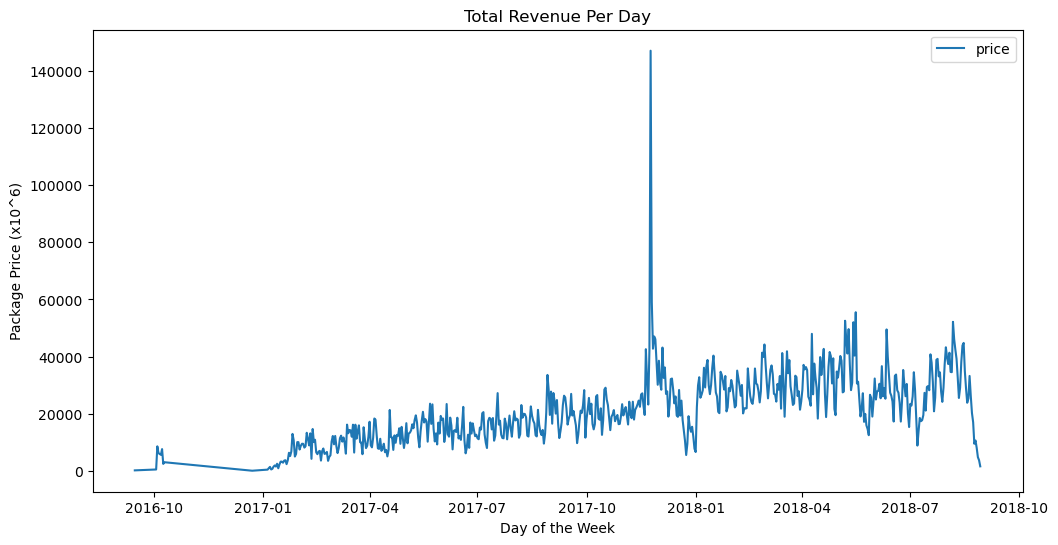

In [23]:
# Import the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns         # optionally you can use seaborn style

plt.figure(figsize=(12, 6))


# YOUR CODE HERE
sns.lineplot(data=data2)
plt.xlabel("Day of the Week")
plt.ylabel("Package Price (x10^6)")
plt.title("Total Revenue Per Day")


plt.show()

The matplotlib line chart plot should produce something like following:

![Bar chart](img/line_chart.png)

### Question 1:

1. Dive into the line chart and tell us in few sentences what you discover about the daily revenue trends during the specific time period. Can you find any general tren during the perios? Take a deeper look at the spike indicated in the provided example and try to suggest why that happened. 

*Hint : (You can take a look at calendar for 2017 and see what you can find!)*


YOUR ANSWER HERE


### Step 2: What's the Distribution of Customer Reviews?

The next step involves calculating customer review rates and visualizing the distribution using a pie chart. This give insight about overal satisfaction of customers of this online store.

Follow these steps:


1. Write a code to group the data by review rate, considering a scale from 1 to 5.
2. Utilize the calculated distribution to create a pie chart, where each slice represents the percentage of reviews.
3. Label each segment of the pie chart with the corresponding review rate (1, 2, 3, 4, 5).
4. Enhance the chart with appropriate titles and labels for clarity.




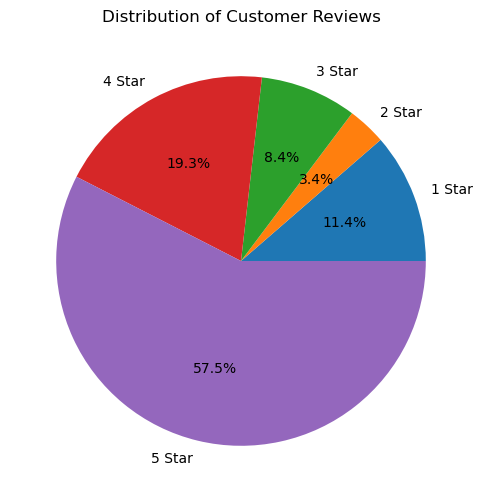

In [16]:
# Import the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns         # optionally you can use seaborn style

plt.figure(figsize=(12, 6))



# YOUR CODE HERE
data3 = data.groupby(data['review_score'])
legend = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star'  ]
plt.pie(data3['review_score'].count(), autopct='%1.1f%%', labels=legend)
plt.title("Distribution of Customer Reviews")

plt.show()

### Question 2:

2. By taking a close look at the pie chart, what can you tell us about the percentage distribution of reviews among the customers? Explain your findings in few sentences.

YOUR ANSWER HERE

### Step 3: What Are Customers Buying?

To identify the top 10 most purchased product categories, and subsequently plot a bar chart, follow these steps:

1. Write a code to group the data by the 'product_category_name_english' field.
2. Calculate the total count each product category.
3. Sort the product categories based on the calculated count in descending order.
4. Select the top 10 product categories with the highest quantity.
5. Utilize the selected data to create a bar chart, where each bar represents a product category and the height represents the quantity.
6. Label each bar with the corresponding product category name.
7. Enhance the chart with appropriate titles and labels for clarity.


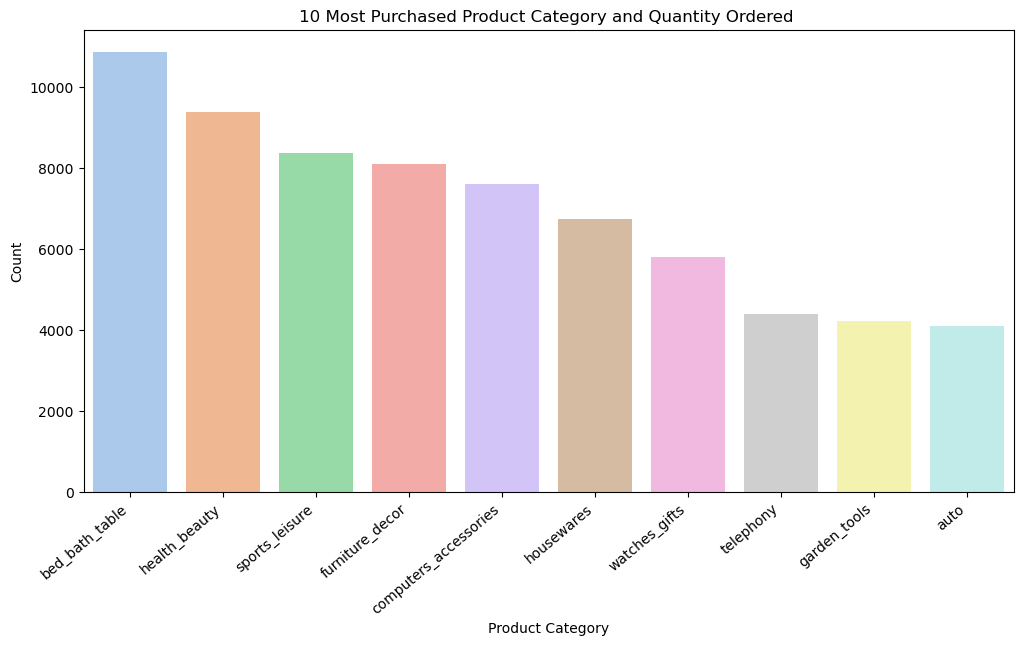

In [17]:
# Import the necessary packages
import matplotlib.pyplot as plt
# import seaborn as sns         # optionally you can use seaborn style

plt.figure(figsize=(12, 6))



# YOUR CODE HERE
data4 = data.groupby(data['product_category_name_english'])
data4 = data4['product_category_name_english'].value_counts()
data4 = data4.sort_values(ascending=False)
data5 = data4.head(10)
data5 = pd.DataFrame(data5)
data5 = data5.reset_index()
barplot = sns.barplot(data5, y=data5['count'], x =data5['product_category_name_english'], palette=sns.color_palette("pastel"))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
plt.title("10 Most Purchased Product Category and Quantity Ordered ")
plt.ylabel('Count')
plt.xlabel('Product Category')
plt.show()

The matplotlib bar chart plot should produce something like following:

![Bar chart](img/top10_products.png)

### Step 4: How Variable Are the Delivery Times for Each Product Category?

Use Box plot to vizualize boxplots for delivery time based on each product category type:

1. Calculate the delivery time by subtracting 'order_delivered_carrier_date' from 'order_delivered_customer_date'. Convert the result to days.
2. Create a new column in your dataset to store the calculated delivery time.
3. Create a new dataframe by grouping data by 'product_category_name_english' column and aggregate the group by averaging delivery time {"delivery_time_days": "mean"}



In [19]:




# YOUR CODE HERE

data['delivery_time'] = abs(data['order_delivered_carrier_date'] - data['order_delivered_customer_date'])
data.dtypes
data['delivery_time_days'] = data['delivery_time'].dt.days
data.dtypes
newdf = data.groupby(data['product_category_name_english']).agg({"delivery_time_days": "mean"})
newdf= newdf.reset_index()
newdf

,product_category_name_english,delivery_time_days
0,agro_industry_and_commerce,7.893204
1,air_conditioning,7.517606
2,art,6.851282
3,arts_and_craftmanship,3.125000
4,audio,9.888268
...,...,...
66,stationery,9.147119
67,tablets_printing_image,8.802469
68,telephony,8.838041
69,toys,8.369925



4. Create a box plot for delivery time for each category (optional hint: You can use `Seaborn` to have plot nicer boxplot)

(note: You can play with boxplot setting, for example if you see your plot is too busy and not readable, you can set `showfliers=False` to prevent showing outliars, and you can change label rotation to 90.)


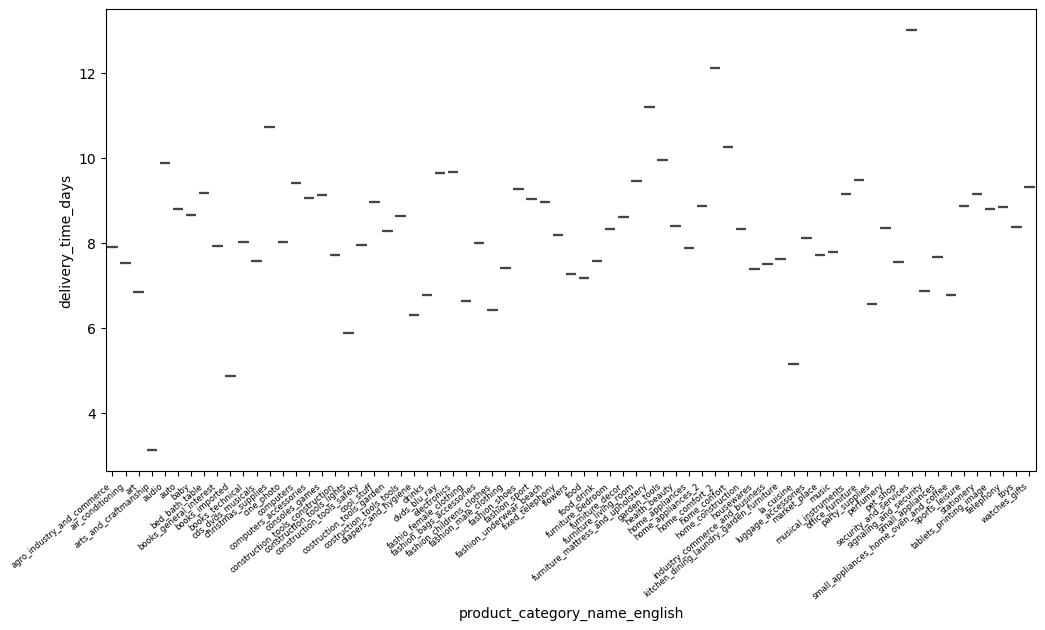

In [20]:
# Import the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns         # optionally you can use seaborn style

plt.figure(figsize=(12, 6))



# YOUR CODE HERE
boxplot = sns.boxplot(newdf, x=newdf['product_category_name_english'], y=newdf['delivery_time_days'])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right", fontsize = 6)


plt.show()

### Question 3:

3. Let's dig into the box plot. What can you tell us about the range and distribution? Share your insights and let's decode the boxes!

YOUR ANSWER HERE

### Step 5: What Does the Distribution Tell Us About Shipment Costs?

To explore the distribution of shipment prices, follow these steps:

1. Extract the 'shipment_price' column from your dataset.
2. Use the data to create a histogram, visualizing the frequency distribution of shipment prices.
3. Customize the histogram with appropriate bins and labels for clarity.


C:\Users\zackd\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


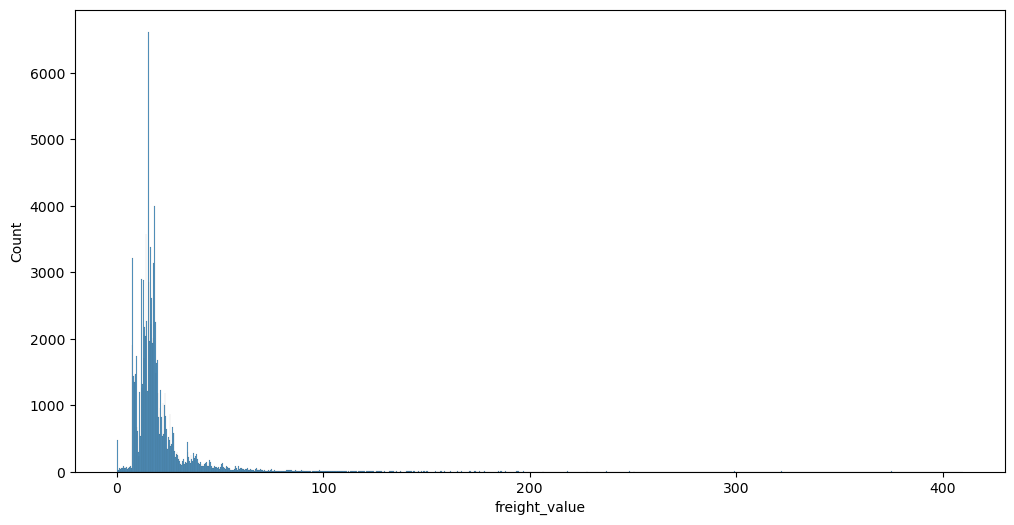

In [26]:
# Import the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns         # optionally you can use seaborn style

plt.figure(figsize=(12, 6))



# YOUR CODE HERE
#data6 = data['shipment_price']



sns.histplot(data=data['freight_value'])



plt.show()

### Question 4:

4. Take a closer look at the histogram! What insights can you gather about how shipment prices are spread out? Dive into the details and share your findings

*Hint : (trye to recap lecture materials about historgram and different data distribution!)*

YOUR ANSWER HERE

## Part 4 (Map Visualization)

### Step 1: Where are customers?

To visualize the geographical distribution of customers, follow these steps:

(try to show first 10,000 customers on map as showing all customer locaitons make the map too heavy)

1. Iterate through the DataFrame, (it is better to just work with first 10,000 customers as showing all customers on map makes the map too heavy and your computer may crash!)
2. Use the 'customer_latitude' and 'customer_longitude' columns to extract the location information for each customer.
3. Use Folium map library to add a `CircleMarker` for each customer on the map.
4. Customize the appearance of the markers to enhance visibility and aesthetics.
5. Display the interactive map, showcasing the locations of the first 10,000 customers.


In [30]:
# Import the Folium library for interactive map visualization
import folium

# Create a Figure object to control the size of the map (width=800 pixels, height=500 pixels)
f = folium.Figure(width=800, height=500)

# Create a Folium Map object centered at the specified location in Brazil with an initial zoom level of 4
m = folium.Map(location=[-15.788497,-47.879873], zoom_start=4).add_to(f)




# YOUR CODE HERE
for index, row in data.head(100).iterrows():
    lat = row['customer_latitude']
    long = row['customer_longitude']
    folium.Marker(location=[lat,long], icon=folium.Icon(color="blue")).add_to(m)





f # display the map

### Step 2: Who Pays More for Transportation?

Let's uncover the geographical variations in transportation costs with a map. Follow these steps:

1. Group the data by 'customer_latitude' and 'customer_longitude'.
2. Calculate the average 'freight_value' for each group to determine the transportation fee in different location group.
3. Use `Folium` to plot each location on the map, using a `branca.colormap` library to represent the average transportation fee with colormap.


In [34]:
# Import the Folium library for interactive map visualization
import folium

# Create a Figure object to control the size of the map (width=800 pixels, height=500 pixels)
f = folium.Figure(width=800, height=500)

# Create a Folium Map object centered at the specified location in Brazil with an initial zoom level of 4
m = folium.Map(location=[-15.788497,-47.879873], zoom_start=4).add_to(f)



# YOUR CODE HERE
transportdata = data.groupby(['customer_latitude', 'customer_longitude'])['freight_value'].mean().reset_index()
transportdata



#f # display the map

,customer_latitude,customer_longitude,freight_value
0,-33.691423,-53.480161,17.892000
1,-33.525601,-53.366420,19.928000
2,-32.563952,-53.384720,22.402222
3,-32.231279,-53.083935,30.267500
4,-32.205217,-52.183042,15.100000
...,...,...,...
14665,2.833882,-60.669115,38.430000
14666,2.844625,-60.712719,27.410000
14667,2.859929,-60.663812,81.966667
14668,3.358232,-59.829057,81.790000


### Step 3: Who Waits More to Recieve the Order?

Now we want to discover how are the delivery times across the country. To show delivery time base on customer locations you can follow these steps:

1. Group the data by 'customer_latitude' and 'customer_longitude'.
2. Calculate the average "delivery_time_days" (you created this column in Part 3, Step 4) for each group to determine the average delivery time in different location group.
3. Use `Folium` to plot each location on the map, using a `branca.colormap` library to represent the average transportation fee with colormap.

In [26]:
# Import the Folium library for interactive map visualization
import folium
# Import the branca library for colormap manipulation
import branca.colormap as cm

# Create a Figure object to control the size of the map (width=800 pixels, height=500 pixels)
f = folium.Figure(width=800, height=500)

# Create a Folium Map object centered at the specified location in Brazil with an initial zoom level of 4
m = folium.Map(location=[-15.788497,-47.879873], zoom_start=4).add_to(f)




# YOUR CODE HERE
recieveorder = data.groupby(['customer_latitude', 'customer_longitude'])['delivery_time_days'].mean()
recieveorder




#f # display the map

customer_latitude  customer_longitude
-33.691423         -53.480161             8.200000
-33.525601         -53.366420            13.200000
-32.563952         -53.384720            10.222222
-32.231279         -53.083935            18.000000
-32.205217         -52.183042            18.000000
                                           ...    
 2.833882          -60.669115            22.000000
 2.844625          -60.712719            27.000000
 2.859929          -60.663812            21.000000
 3.358232          -59.829057            16.000000
 3.844901          -51.830146            27.000000
Name: delivery_time_days, Length: 14670, dtype: float64

### Question 5:

Imagine you are the team leader of data analytics department for this online retail company! The CEO declared that the company wants to improve its delivery performance by establishing 2 more inventory hubs (warehouse) as a pre-storage strategy to boost delivery speed and reduce delivery cost for customers. 
Based on the map visualization from previous steps, which areas would you suggest for placement of new inventory hubs for this company? Don't forget to explain why you suggest those areas! 

*(Note: You take screen shot from the map and try to indicate 2 areas as candidate areas on the picture and put the picture in your answer.)*

YOUR ANSWER HERE